In [15]:
# Kütüphaneleri import edelim
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [16]:
# Scikit-learn kütüphanesindeki make_moon fonksiyonuyla sentetik bir veri seti oluşturalım

from sklearn.datasets import make_moons

n = 10000

X, y = make_moons(n,noise=0.05,random_state=42)

In [17]:
# Oluşan verilere bakalım ve sonrasında daha iyi analiz edebilmek için görselleştirelim
X, y

(array([[ 0.37469348, -0.16680448],
        [-0.84234358,  0.11898889],
        [ 0.43910037,  0.8384732 ],
        ...,
        [-0.00407283,  0.25138056],
        [ 0.86363672,  0.51891346],
        [ 1.01028397, -0.43472843]]),
 array([1, 0, 0, ..., 1, 0, 1], dtype=int64))

In [19]:
# Array şeklinde olan verilerin boyutlarına bakalım ve sonra görselleştirelim.
X.shape, y.shape

((10000, 2), (10000,))

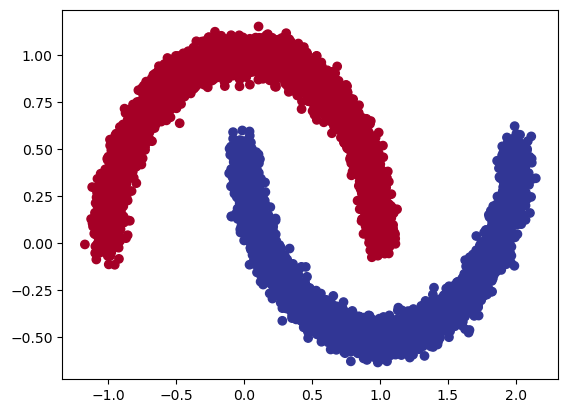

In [21]:
# Verisetini daha iyi anlamak adına verileri görselleştirelim
plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.RdYlBu)

In [14]:
# Modelimizi train ve test olarak ikiye ayıralım
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [25]:
X_train.shape, X_test.shape

((7000, 2), (3000, 2))

In [53]:
# Şimdi yapay sinir ağı modelimizi oluşturalım.
# Bu bir binary classification problemi olduğu için 
# Son dense 1 nörondan oluşacak ve aktivasyon olarak sigmoid'i kullanacak
# Loss fonksiyonu olarak ise Binary Crossentropy kullanacağız.
# Optimizer olarak ise Adam kullanacağız.
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model.compile(loss="binary_crossentropy",
             optimizer=tf.keras.optimizers.Adam(), 
             metrics=["accuracy"])

In [54]:
# Veri setimizle modeli eğitelim.
model.fit(X_train, y_train, epochs=100)

Epoch 1/100
219/219 [==============================] - 1s 1ms/step - loss: 0.5414 - accuracy: 0.7803
Epoch 2/100
219/219 [==============================] - 0s 1ms/step - loss: 0.2949 - accuracy: 0.8754
Epoch 3/100
219/219 [==============================] - 0s 1ms/step - loss: 0.2363 - accuracy: 0.8889
Epoch 4/100
219/219 [==============================] - 0s 1ms/step - loss: 0.2156 - accuracy: 0.8933
Epoch 5/100
219/219 [==============================] - 0s 1ms/step - loss: 0.2085 - accuracy: 0.8941
Epoch 6/100
219/219 [==============================] - 0s 1ms/step - loss: 0.2058 - accuracy: 0.8944
Epoch 7/100
219/219 [==============================] - 0s 1ms/step - loss: 0.2049 - accuracy: 0.8944
Epoch 8/100
219/219 [==============================] - 0s 1ms/step - loss: 0.2038 - accuracy: 0.8934
Epoch 9/100
219/219 [==============================] - 0s 1ms/step - loss: 0.2035 - accuracy: 0.8959
Epoch 10/100
219/219 [==============================] - 0s 1ms/step - loss: 0.2033 - accura

219/219 [==============================] - 0s 1ms/step - loss: 0.0014 - accuracy: 1.0000
Epoch 82/100
219/219 [==============================] - 0s 1ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 83/100
219/219 [==============================] - 0s 1ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 84/100
219/219 [==============================] - 0s 1ms/step - loss: 9.3684e-04 - accuracy: 1.0000
Epoch 85/100
219/219 [==============================] - 0s 1ms/step - loss: 8.2404e-04 - accuracy: 1.0000
Epoch 86/100
219/219 [==============================] - 0s 1ms/step - loss: 7.1238e-04 - accuracy: 1.0000
Epoch 87/100
219/219 [==============================] - 0s 1ms/step - loss: 6.2884e-04 - accuracy: 1.0000
Epoch 88/100
219/219 [==============================] - 0s 1ms/step - loss: 5.5035e-04 - accuracy: 1.0000
Epoch 89/100
219/219 [==============================] - 0s 1ms/step - loss: 4.9299e-04 - accuracy: 1.0000
Epoch 90/100
219/219 [==============================] - 0s 1ms/step - l

In [55]:
# Şimdi ise modeli görselleştirelim
# Görmediği veriler üzerinde modele tahmin yaptıralım
y_preds = model.predict(X_test)

94/94 [==============================] - 0s 742us/step


In [56]:
# Şimdi yaptığı tahminleri confusion matrix ile değerlendirelim
from sklearn.metrics import confusion_matrix
# y_preds'in 0 ile 1'lerden oluşması gerekiyor bu yüzden tf.round() kullanıyoruz
confusion_matrix(y_test, tf.round(y_preds))

array([[1539,    0],
       [   0, 1461]], dtype=int64)

In [59]:
# Şimdi modelimizin sınır çizgilerini görmek için plot_decision_boundary fonksiyonunu oluşturup, kullanalım.
def plot_decision_boundary(model, X, y):
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  x_in = np.c_[xx.ravel(), yy.ravel()]
  y_pred = model.predict(x_in)
  if len(y_pred[0]) > 1:
    print("multiclass classification yapiyor")
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("binary classificition yapiyor")
    y_pred = np.round(y_pred).reshape(xx.shape)
  
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 0s 779us/step
binary classificition yapiyor
313/313 [==============================] - 0s 756us/step
binary classificition yapiyor


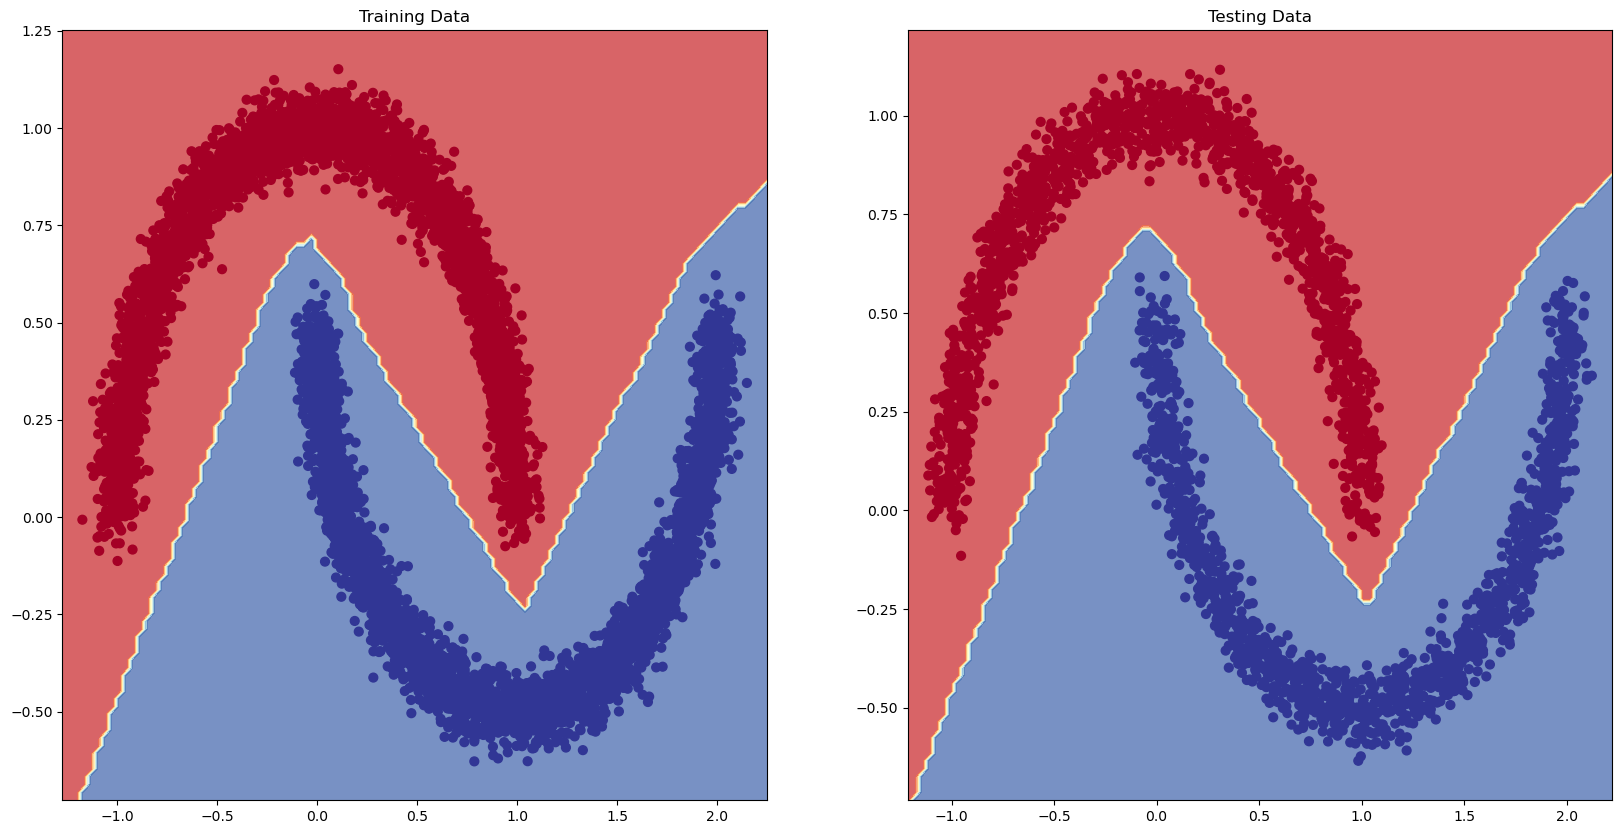

In [76]:
# Fonksiyonu kullanıp görselleştirelim
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.title("Training Data")
plot_decision_boundary(model, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Testing Data")
plot_decision_boundary(model, X_test, y_test)

In [62]:
# Harika bir şekilde ayırmış!